<h1><center><font size=6>Microsoft Stock Price Prediction</center></font></h1>

# **Introduction**
Microsoft Stock Price Prediction using machine learning is a sophisticated endeavor that aims to forecast the future price movements of one of the world's most influential and widely traded stocks. Financial markets are ever-changing and fast-paced. Therefore, information on stock price predictions would greatly improve the investment strategies and other economic analyses. Specifically, this project includes machine learning algorithms such as linear regression, time-series forecasting ARIMA, and Random Forest regression for enhanced linear complex data. Additionally, it also involves the use of historical data that entails stock prices and trading volume. This data is vital for establishing the patterns that will be used in the predictive model. The core objective is established a model to be used by investors and analysts to enhance their decision making when determining the best stock to invest in, the best time, and the total amount to invest.

## **Objectives:**

The ultimate goal is to develop a reliable predictive framework that investors and analysts can use to make informed decisions, optimize investment portfolios, and understand market dynamics. Specific objectives include:

- To understand historical price movements.
- To implement and compare different predictive models.
- To evaluate model performance.
- To analyze market sentiment and technical indicators.
- To develop a risk-adjusted predictive framework.

In [80]:
# Mounting the drive in google colab (should be commented out when working on a local machine)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing essential libraries & the dataset:**

In [81]:
# importing libraries.
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [82]:
# Importing the data set in google colab
data = pd.read_csv('/content/drive/MyDrive/Copilot/Microsoft_Stock.csv')

In [83]:
df=data.copy()

In [84]:
data.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [86]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1511.00,107.39,56.69,40.34,57.86,93.99,139.44,245.03
High,1511.00,108.44,57.38,40.74,58.06,95.10,140.32,246.13
Low,1511.00,106.29,55.98,39.72,57.42,92.92,137.82,242.92
Close,1511.00,107.42,56.70,40.29,57.86,93.86,138.97,244.99
Volume,1511.00,30198625.08,14252659.09,101612.00,21362129.00,26629615.00,34319615.50,135227059.00


In [87]:
# Creating colums for the day, month and year from the Date column
data['Date'] = pd.to_datetime(data['Date'])

data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

data.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,1,4,2015
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,2,4,2015
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,6,4,2015
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,7,4,2015
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,8,4,2015


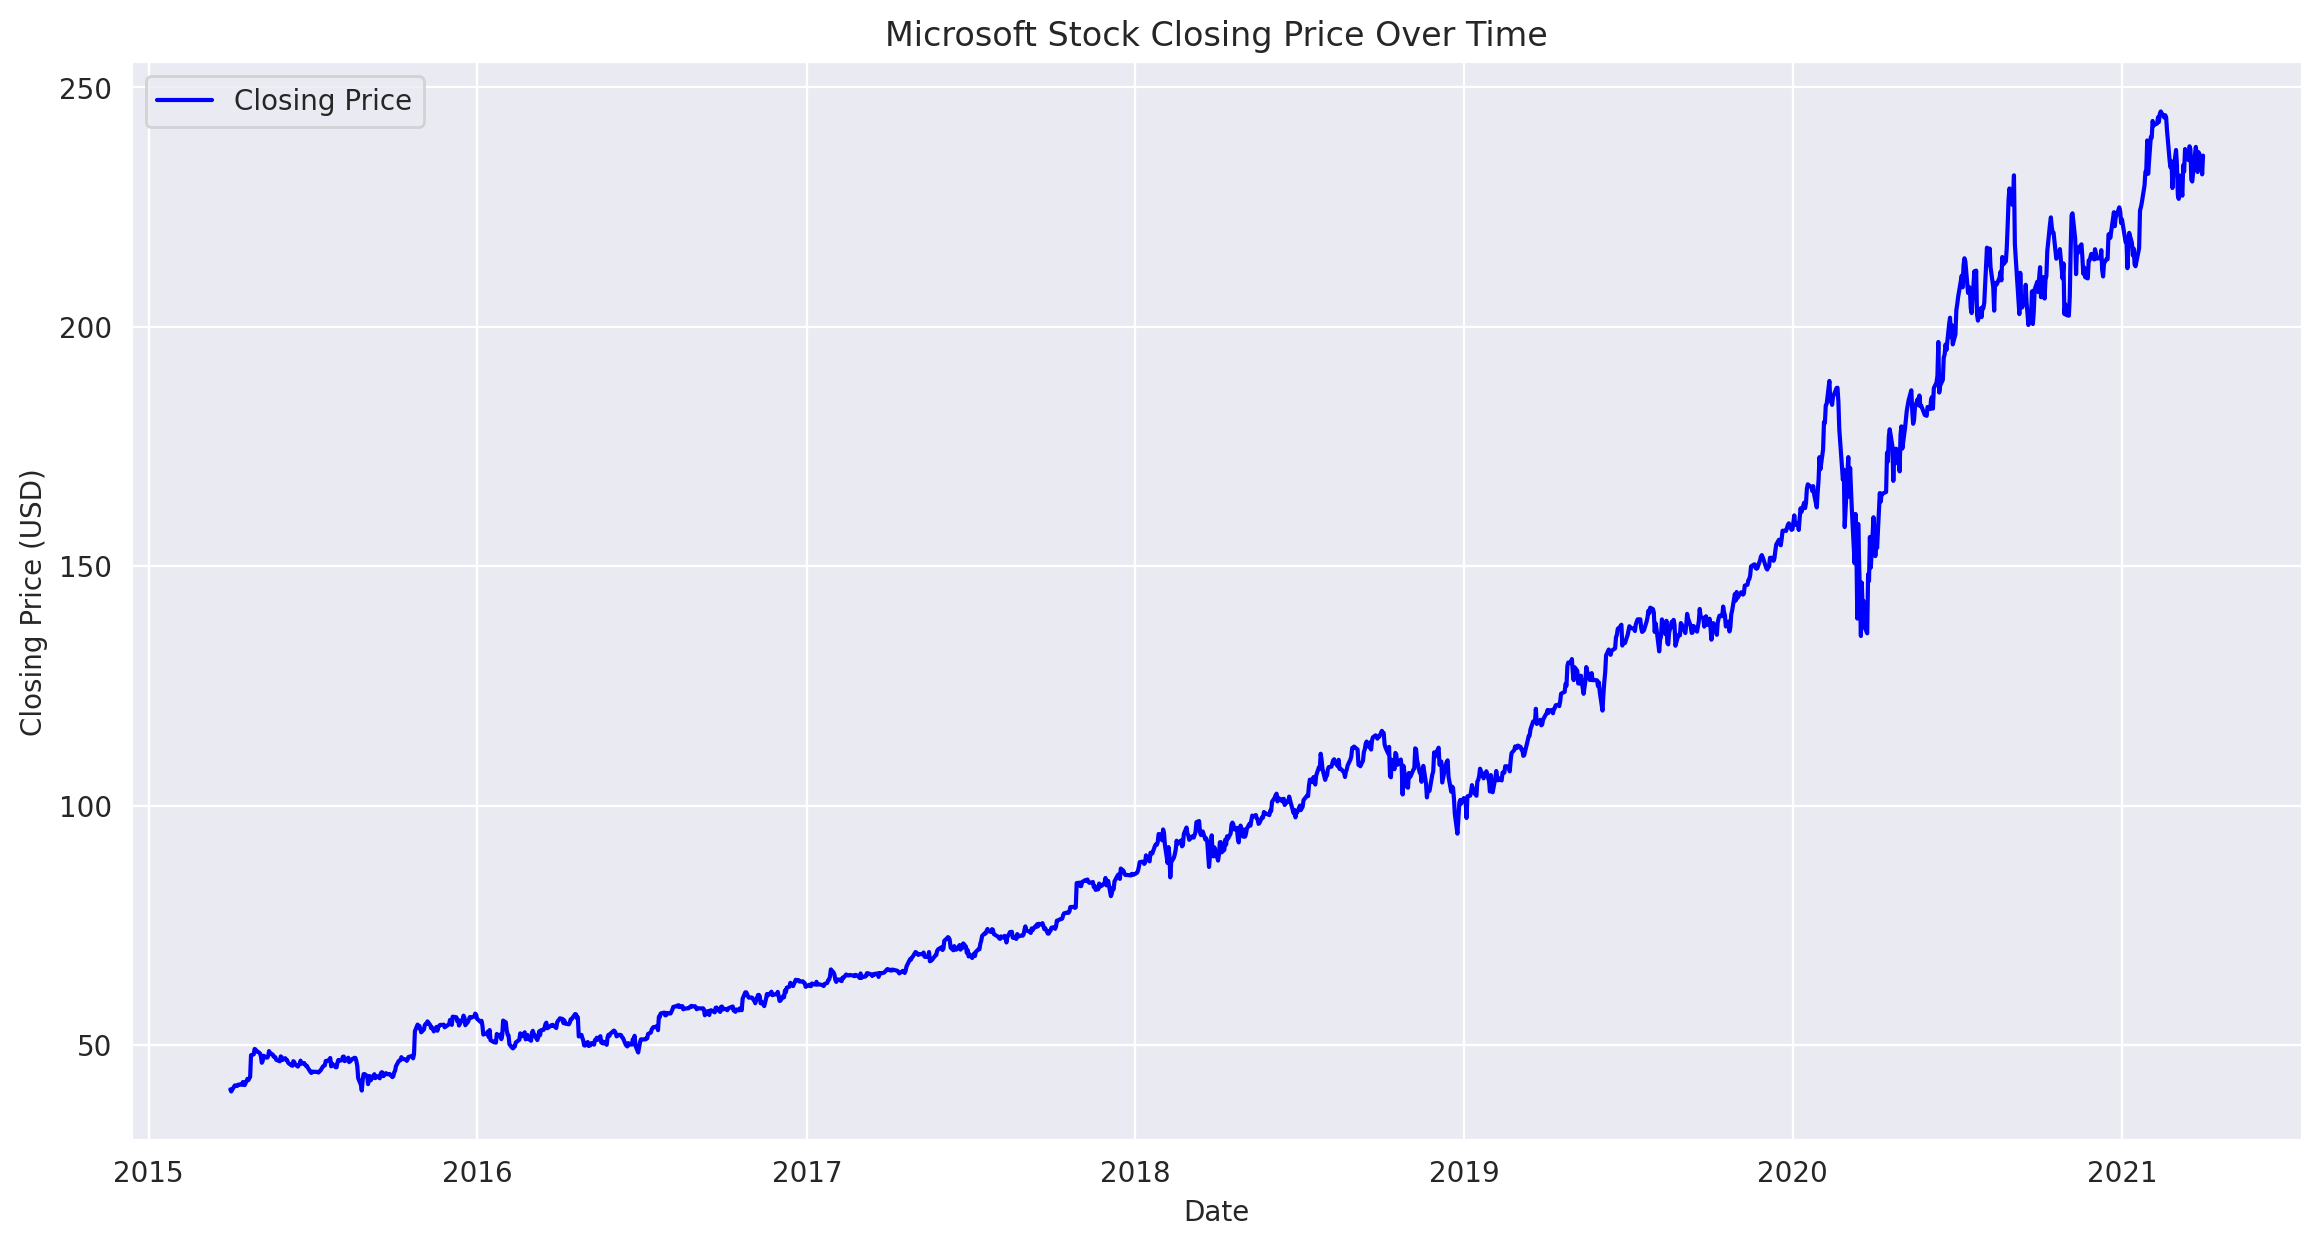

In [88]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plotting
plt.figure(figsize=(14, 7), dpi=200)
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.title('Microsoft Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


## **Observation:**
The plot above illustrates the closing price of Microsoft's stock over time. It provides a visual representation of the overall trend in the stock's closing price, highlighting periods of growth, stability, and any significant fluctuations. This visualization can be a foundational step in further analyzing the stock's performance, understanding its historical volatility, and identifying potential trends for future investments.

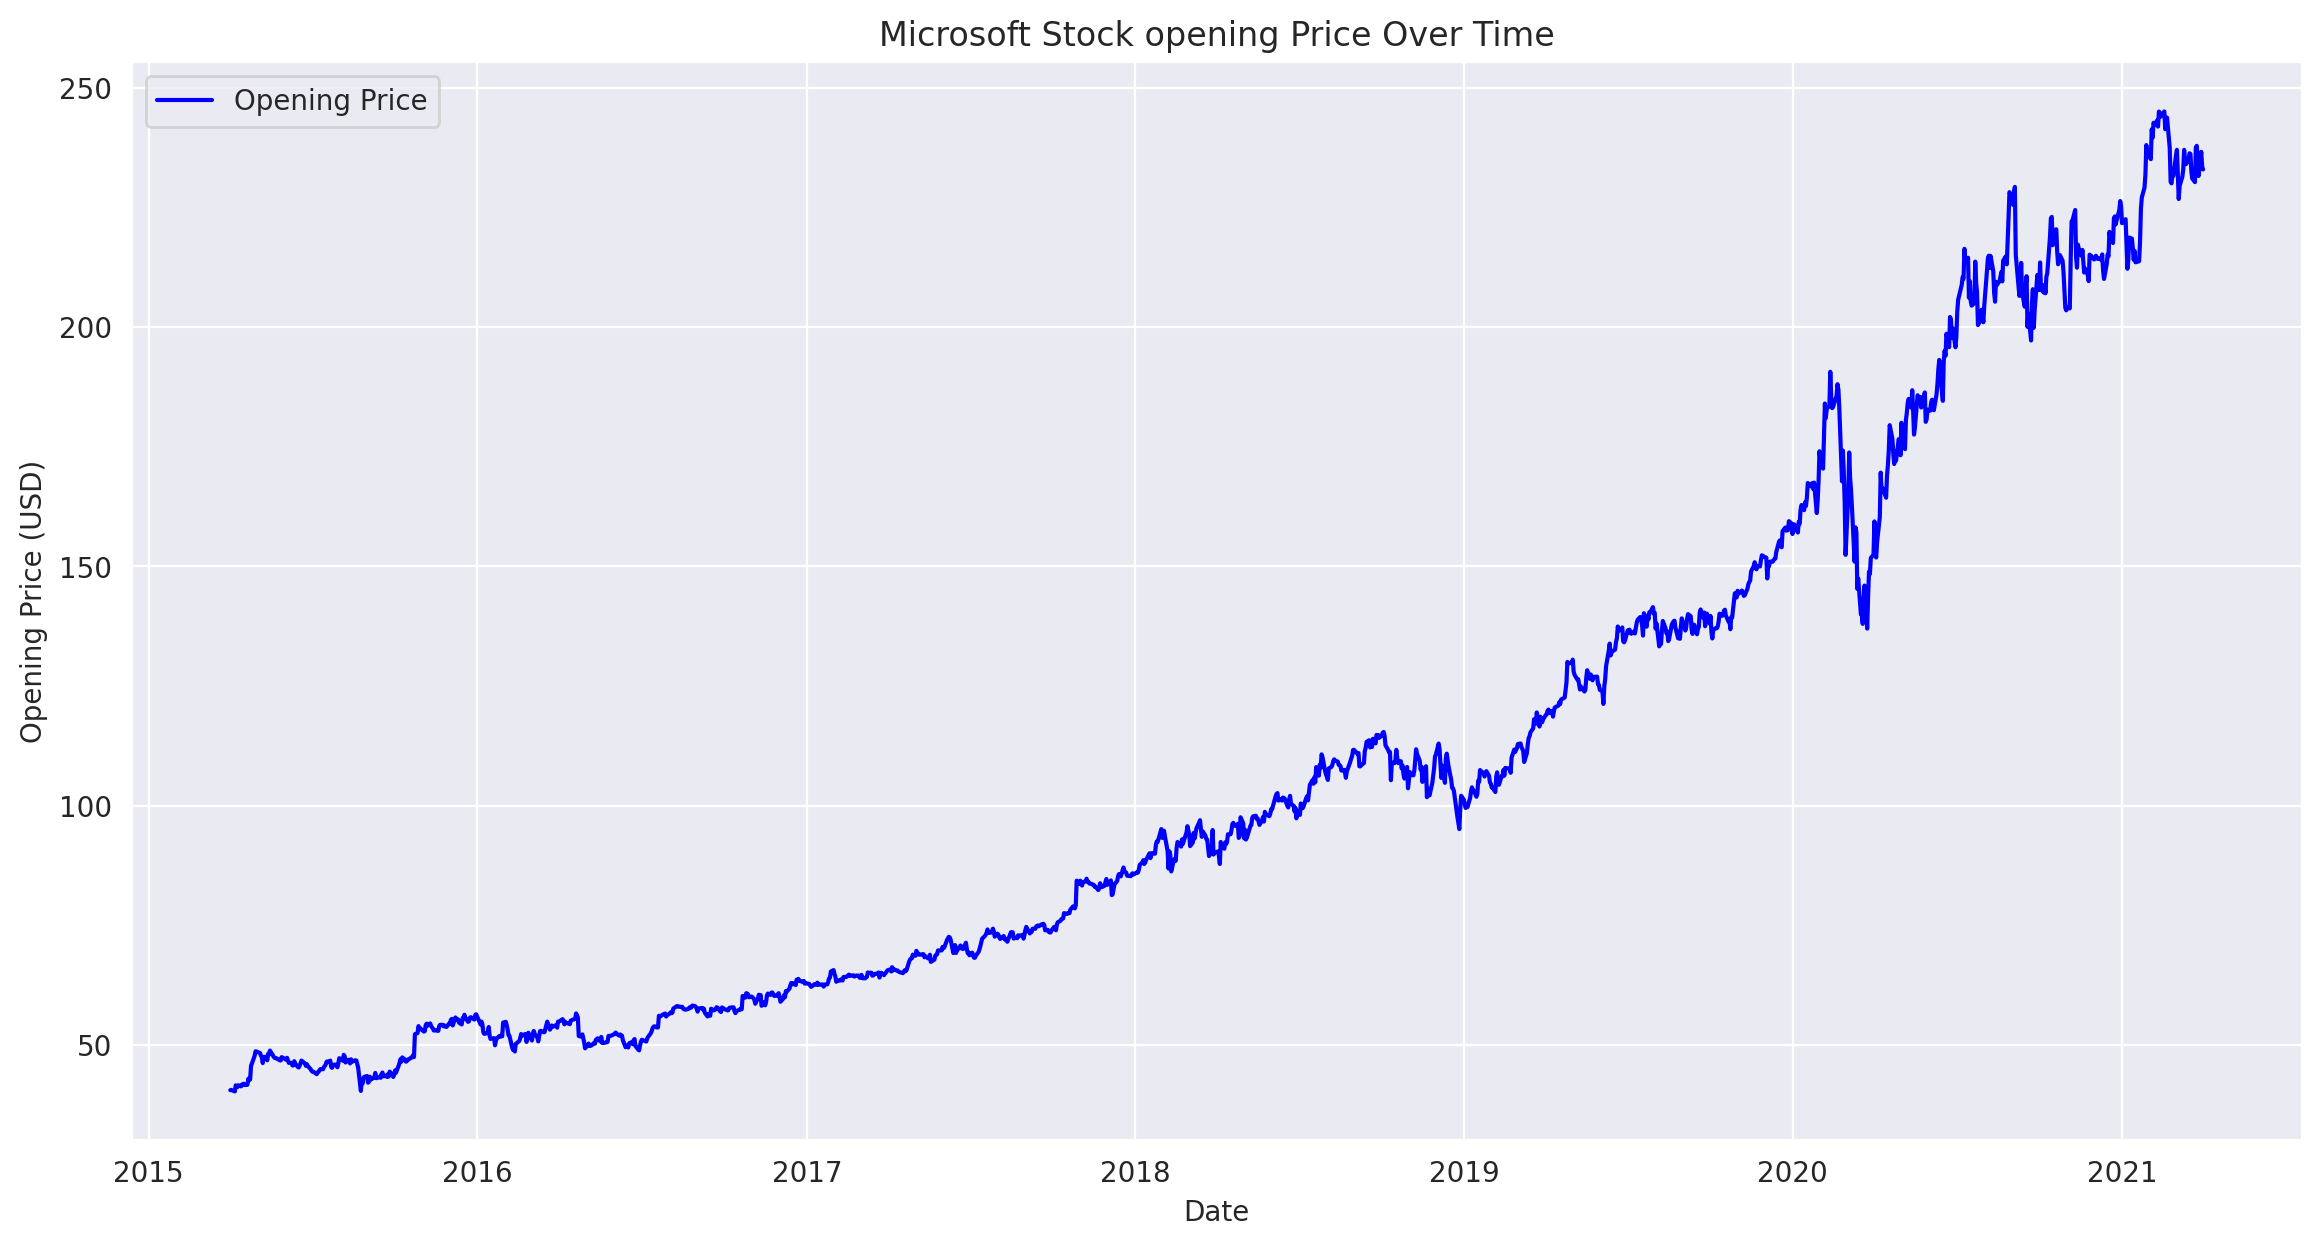

In [89]:
# Plotting
plt.figure(figsize=(14, 7), dpi=200)
plt.plot(data['Date'], data['Open'], label='Opening Price', color='blue')
plt.title('Microsoft Stock opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

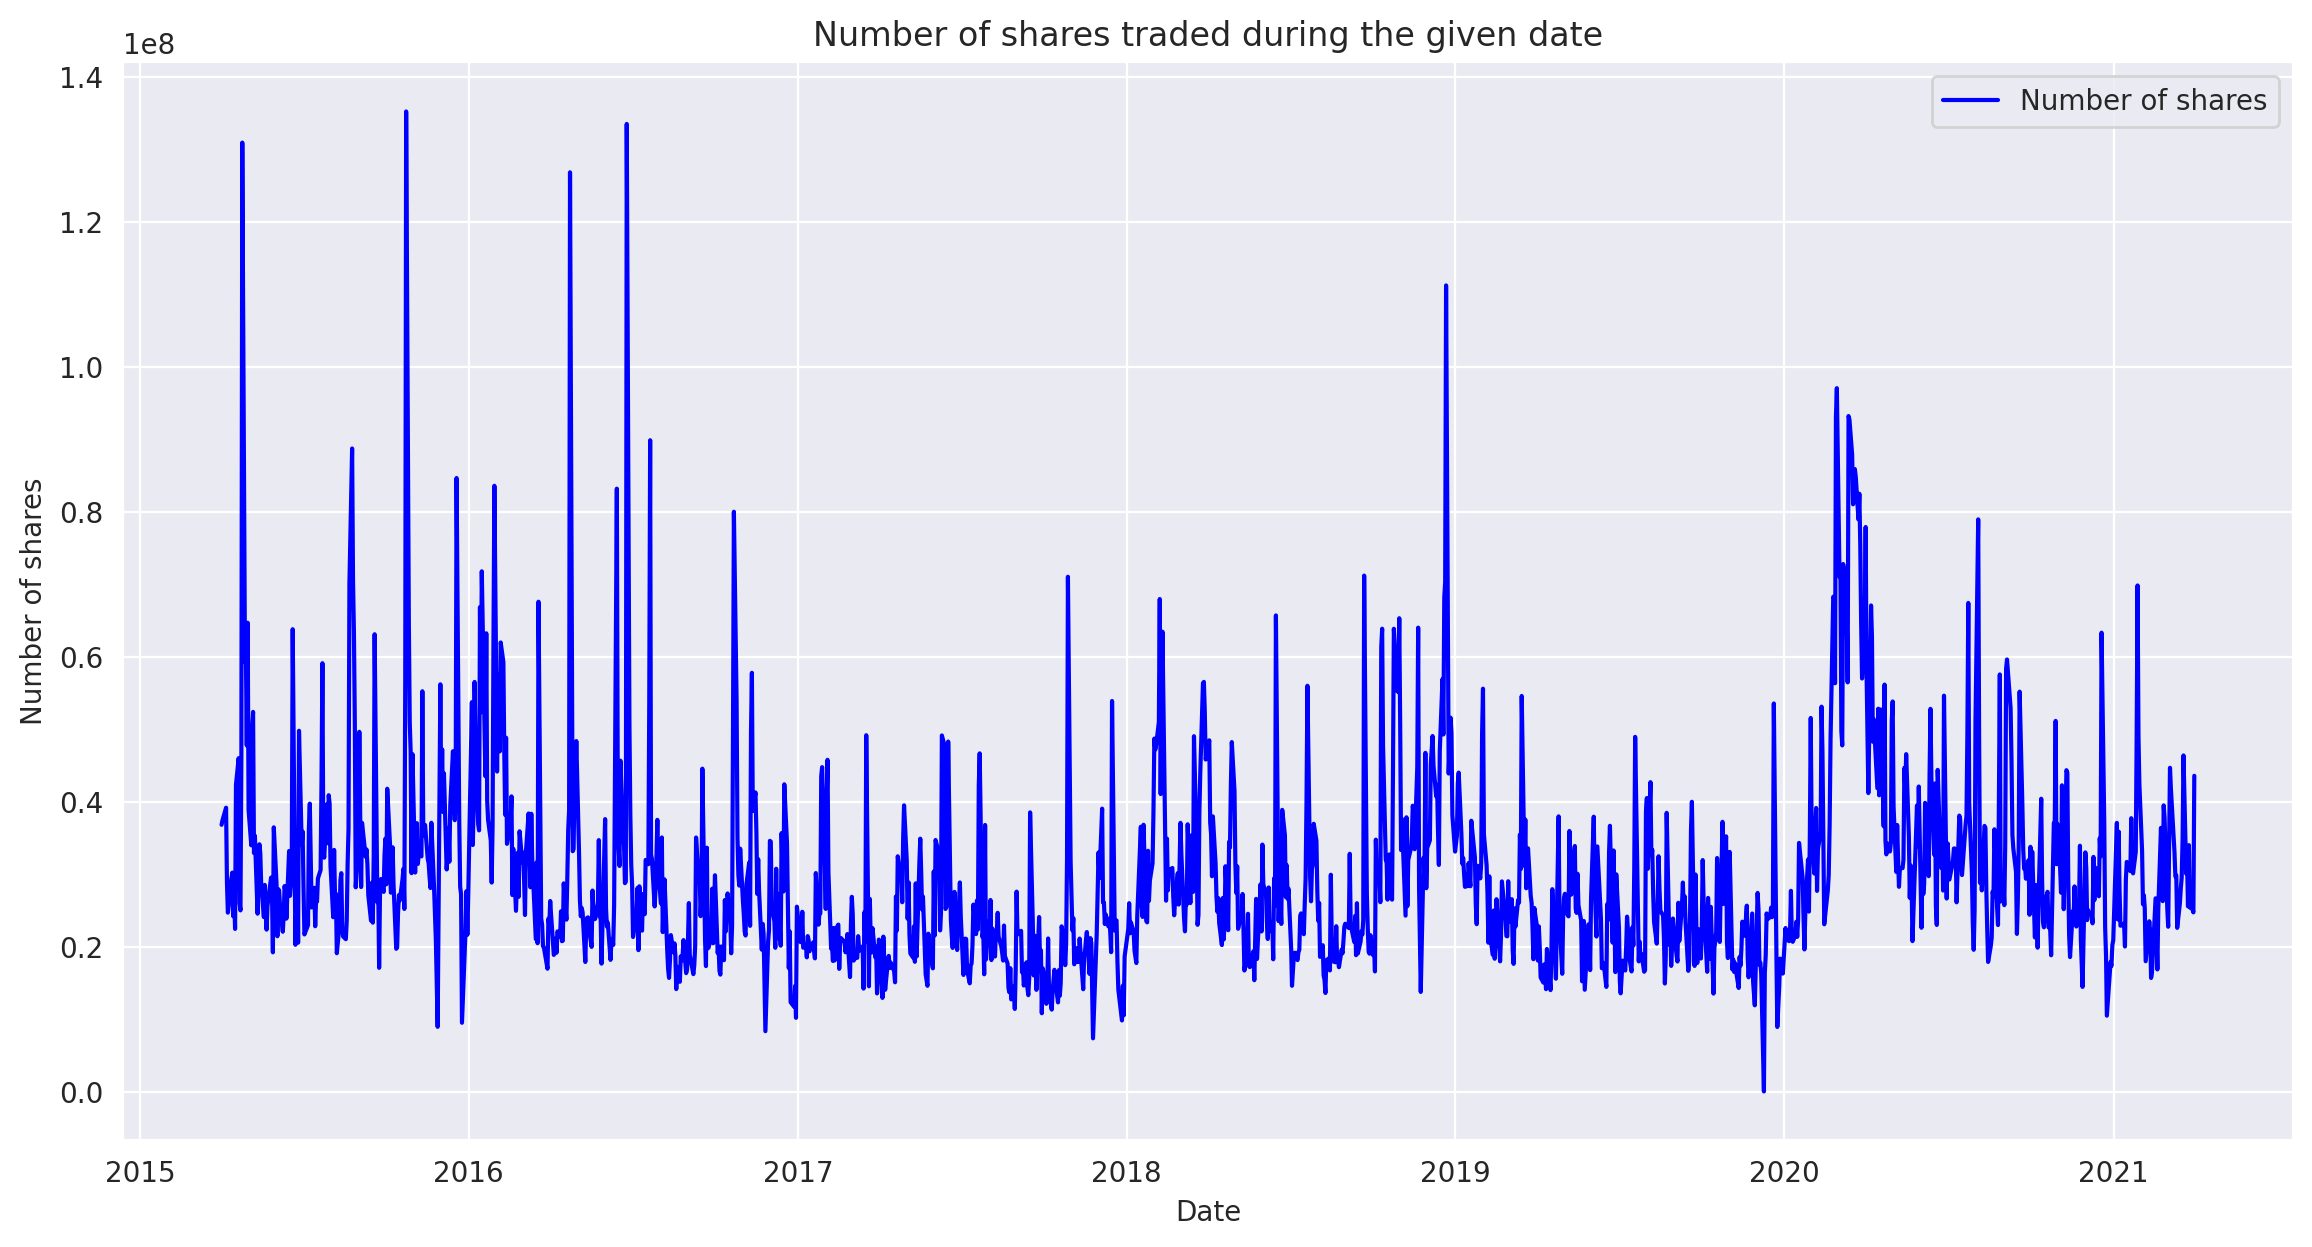

In [90]:
# Plotting
plt.figure(figsize=(14, 7), dpi=200)
plt.plot(data['Date'], data['Volume'], label='Number of shares', color='blue')
plt.title('Number of shares traded during the given date')
plt.xlabel('Date')
plt.ylabel('Number of shares')
plt.legend()
plt.grid(True)
plt.show()

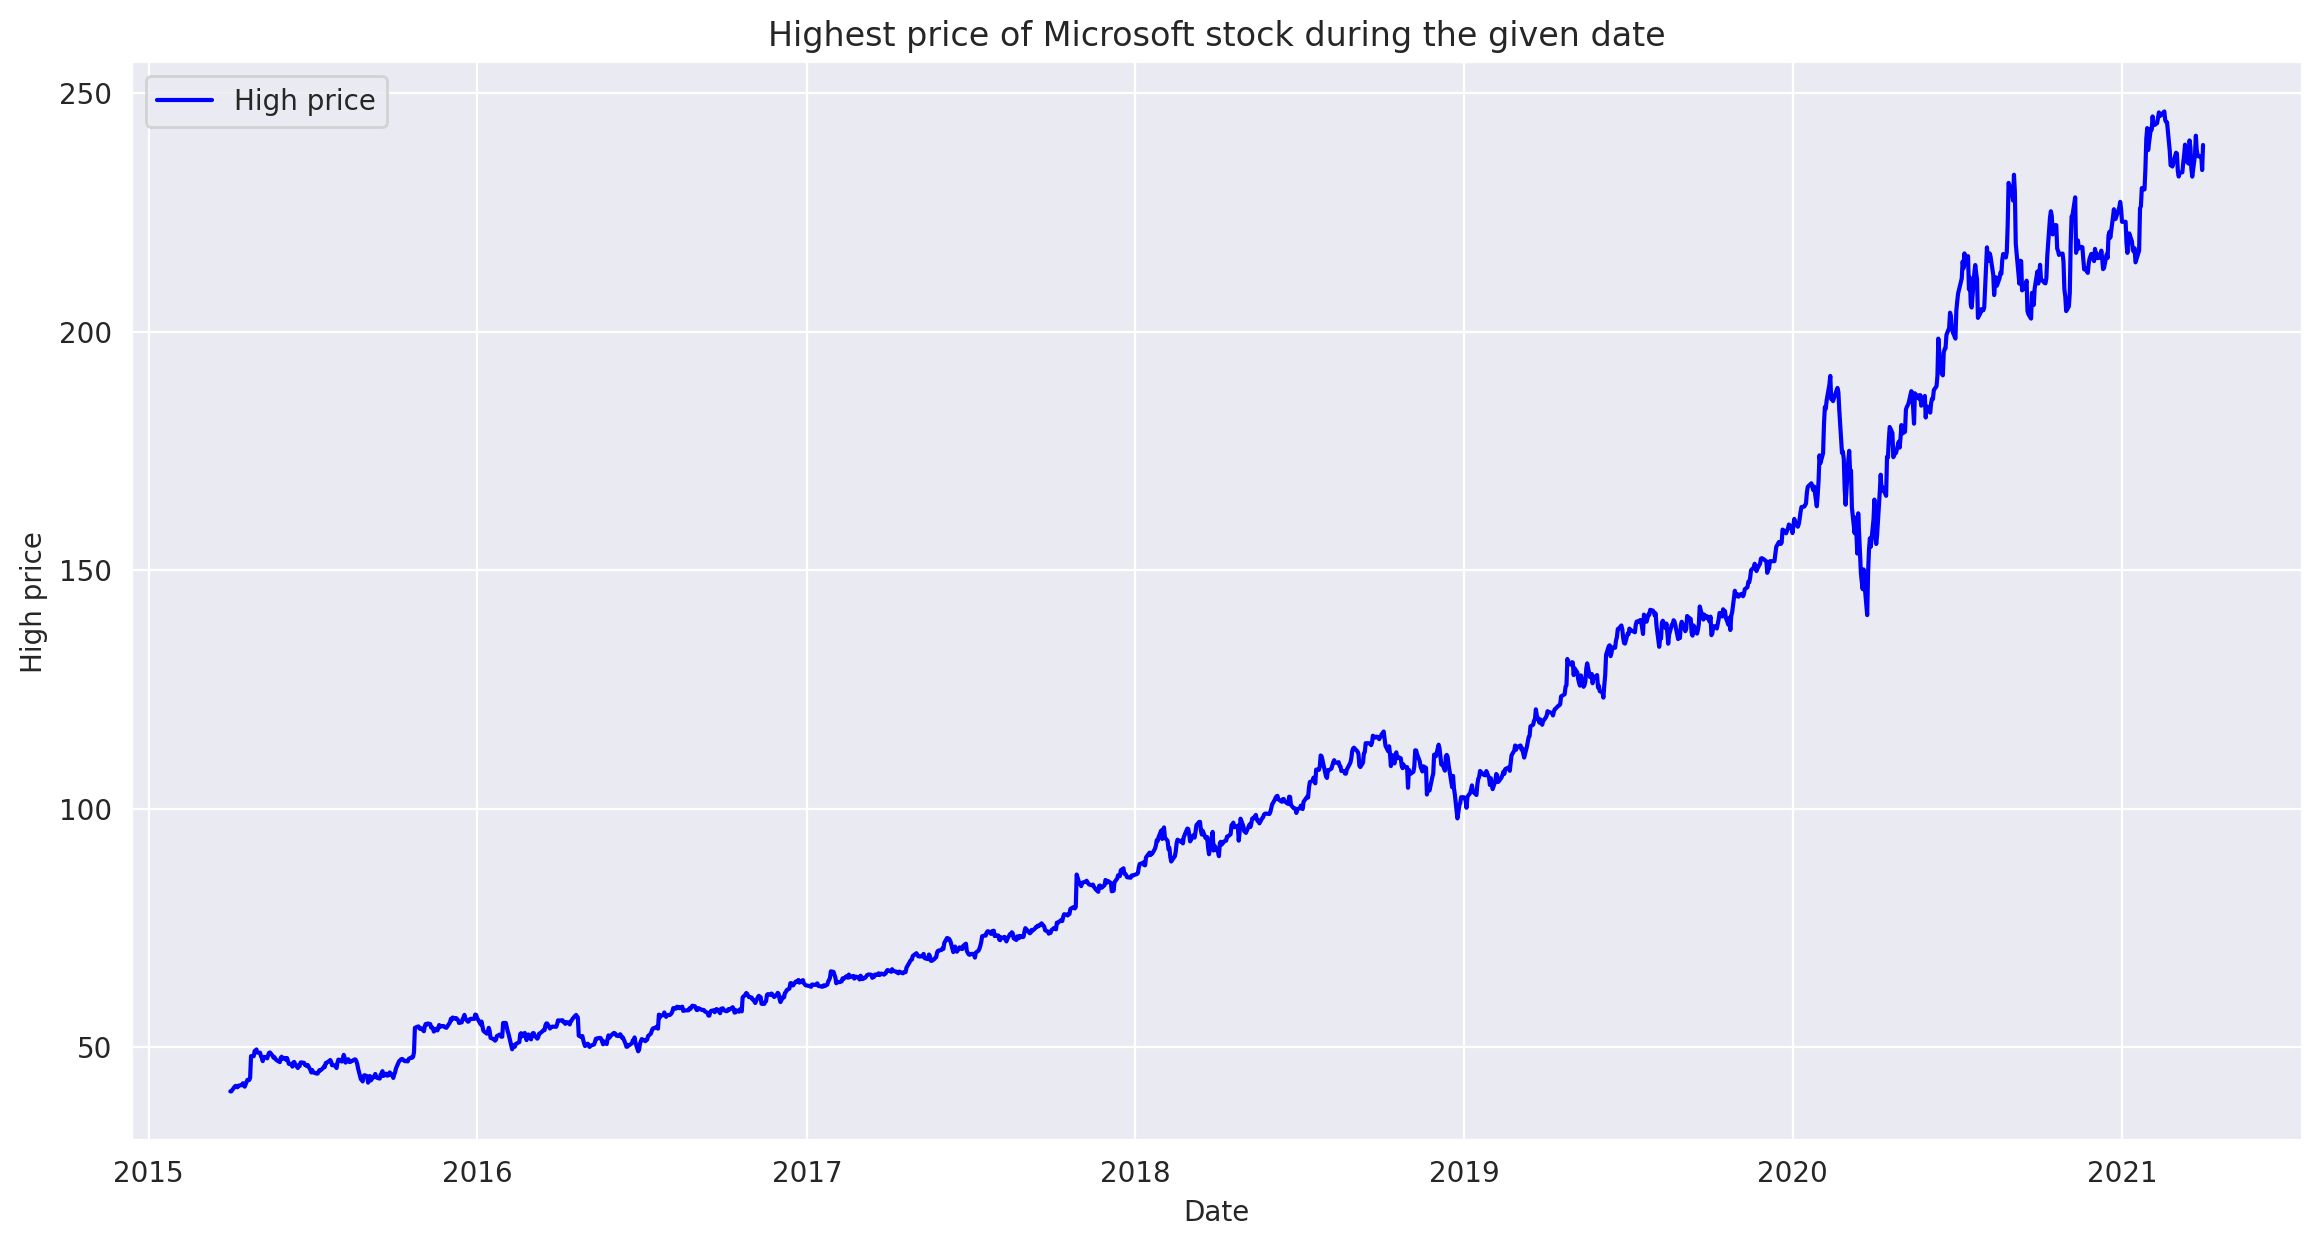

In [91]:
# Plotting
plt.figure(figsize=(14, 7), dpi=200)
plt.plot(data['Date'], data['High'], label='High price', color='blue')
plt.title('Highest price of Microsoft stock during the given date')
plt.xlabel('Date')
plt.ylabel('High price')
plt.legend()
plt.grid(True)
plt.show()

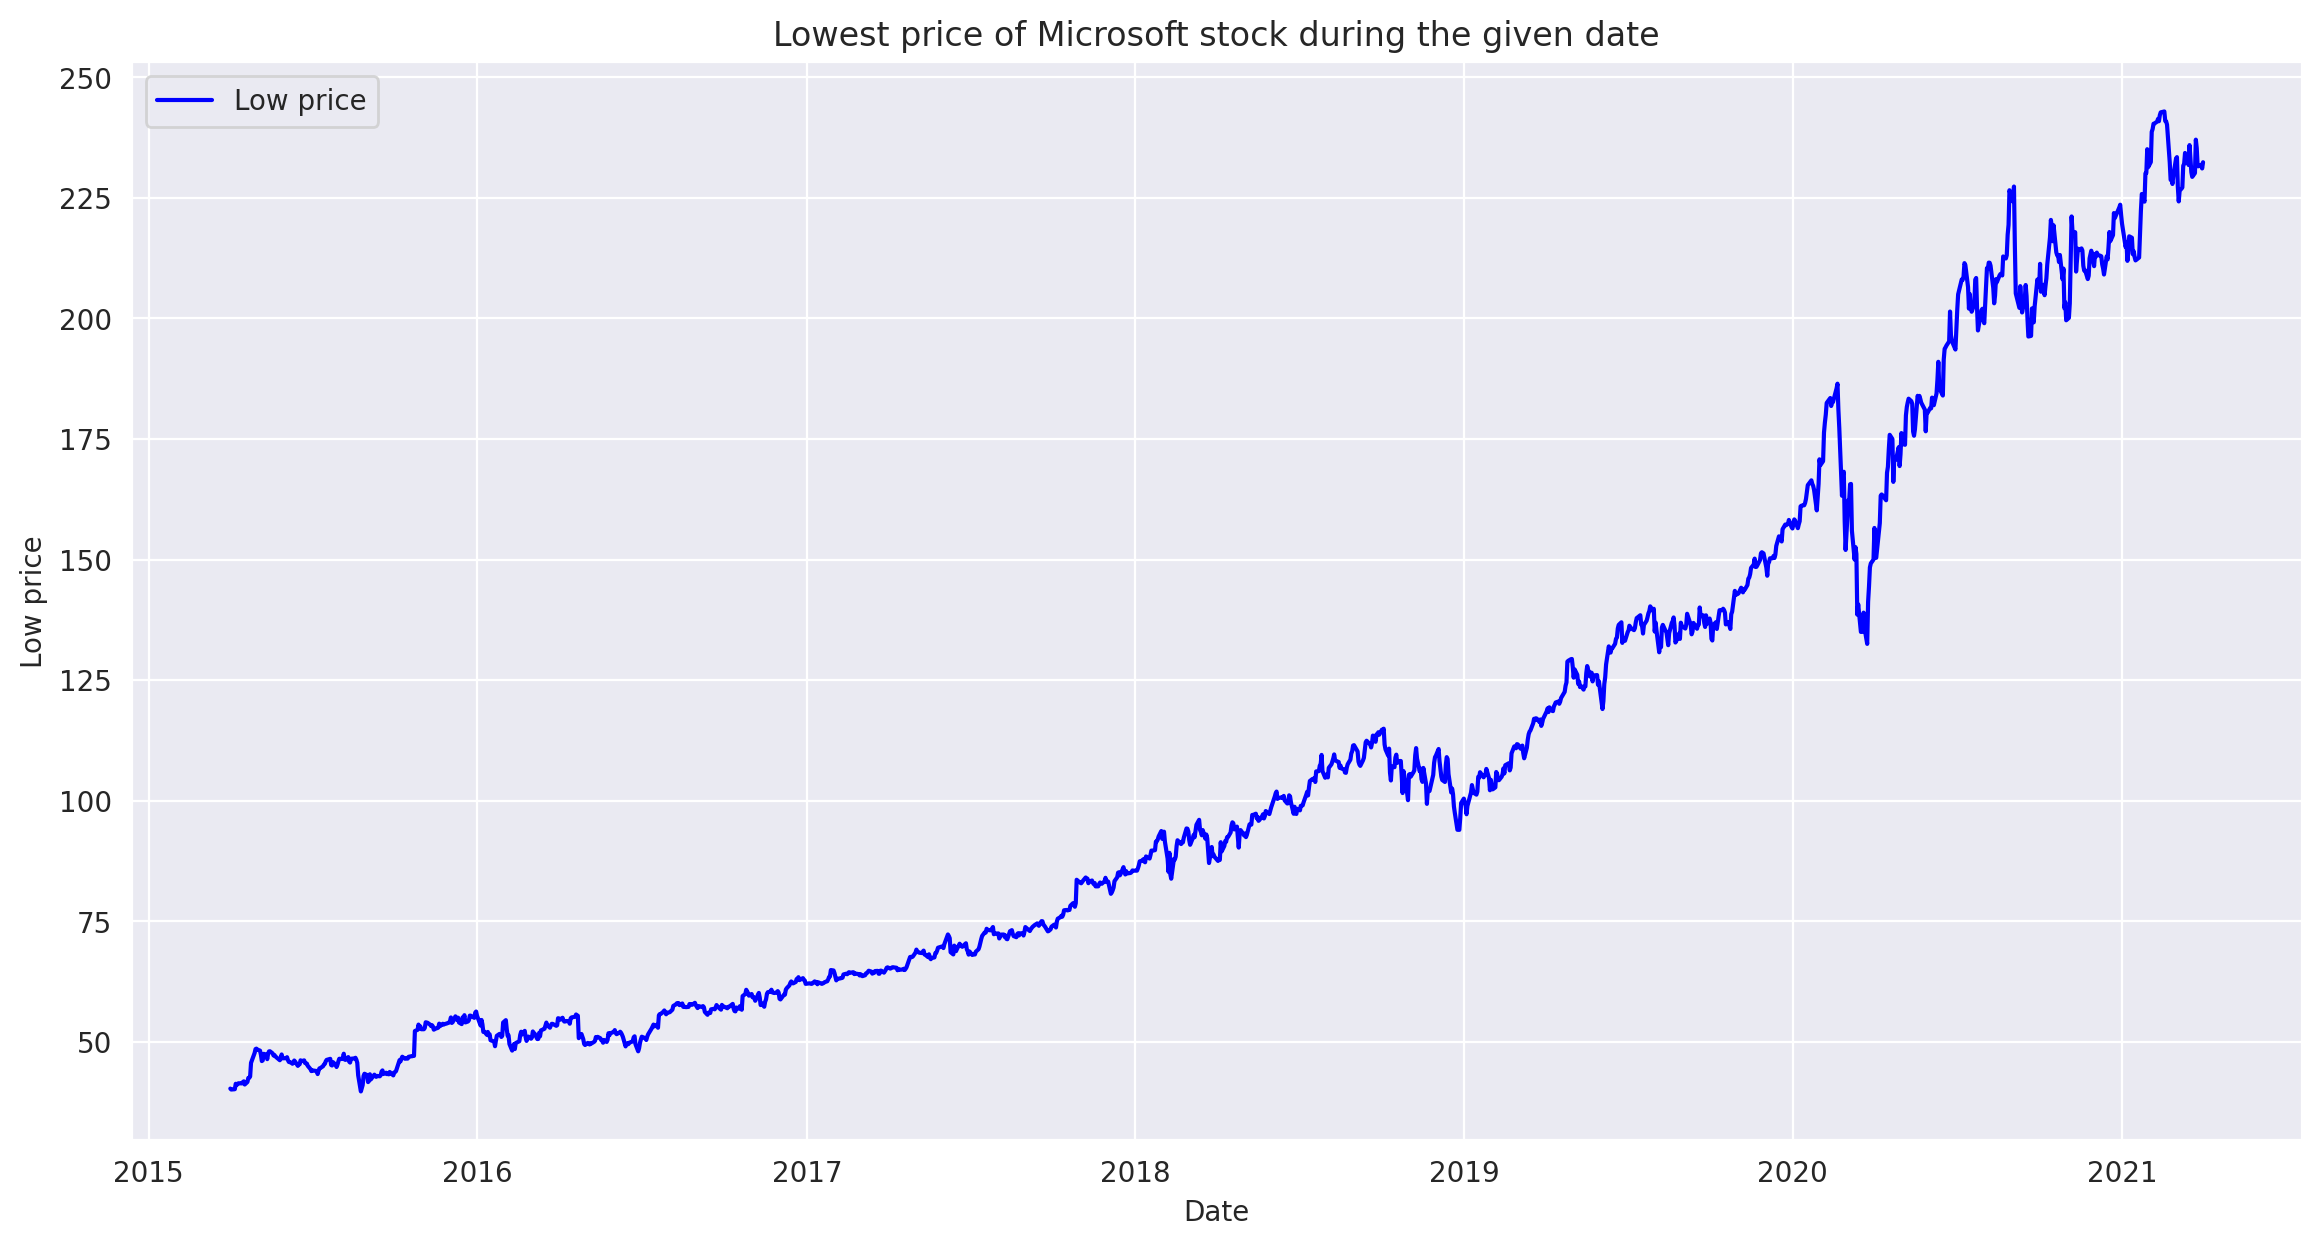

In [92]:
# Plotting
plt.figure(figsize=(14, 7), dpi=200)
plt.plot(data['Date'], data['Low'], label='Low price', color='blue')
plt.title('Lowest price of Microsoft stock during the given date')
plt.xlabel('Date')
plt.ylabel('Low price')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
# Function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

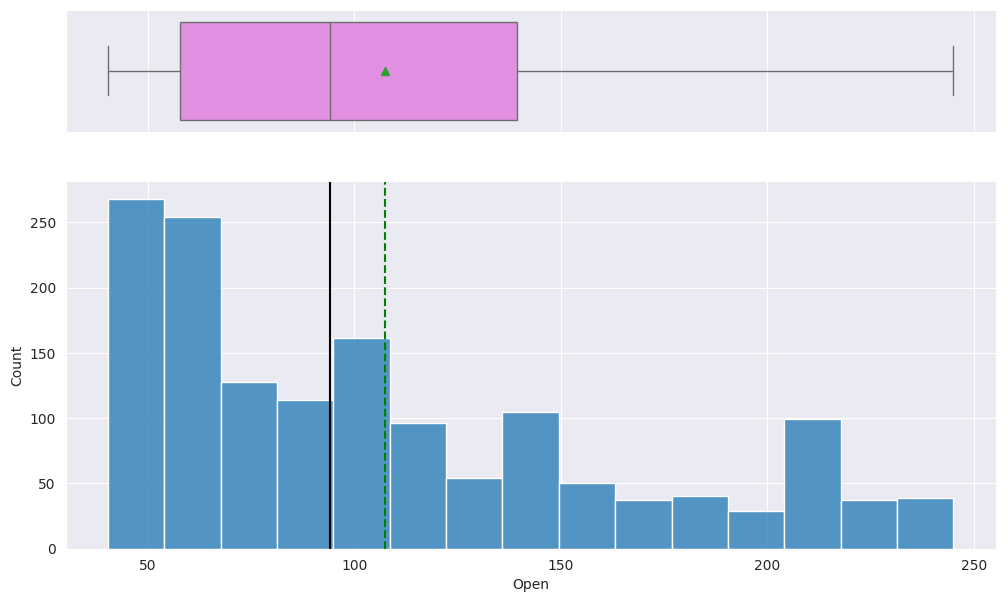

In [94]:
histogram_boxplot(data, "Open")

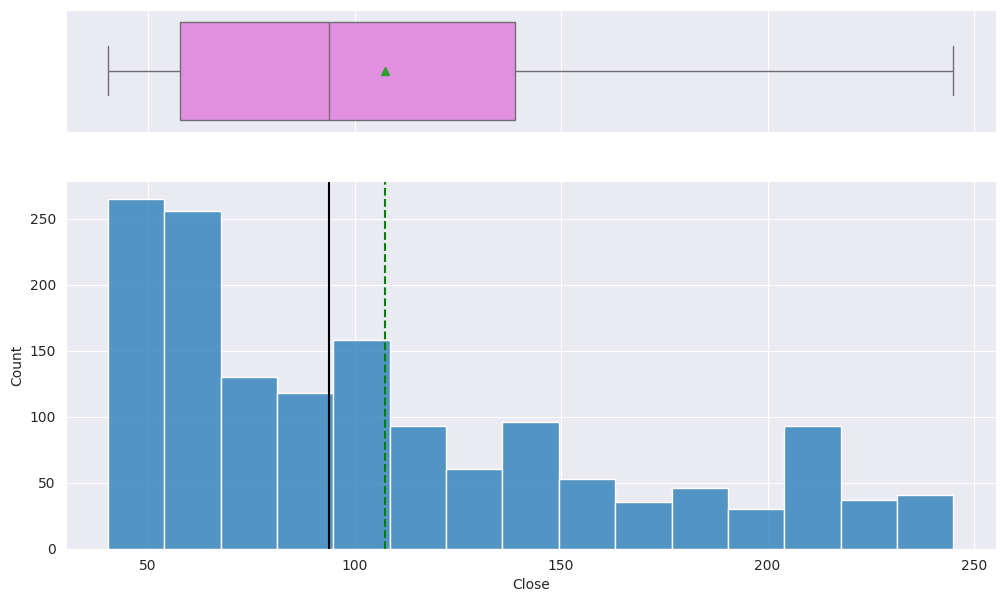

In [95]:
histogram_boxplot(data, "Close")

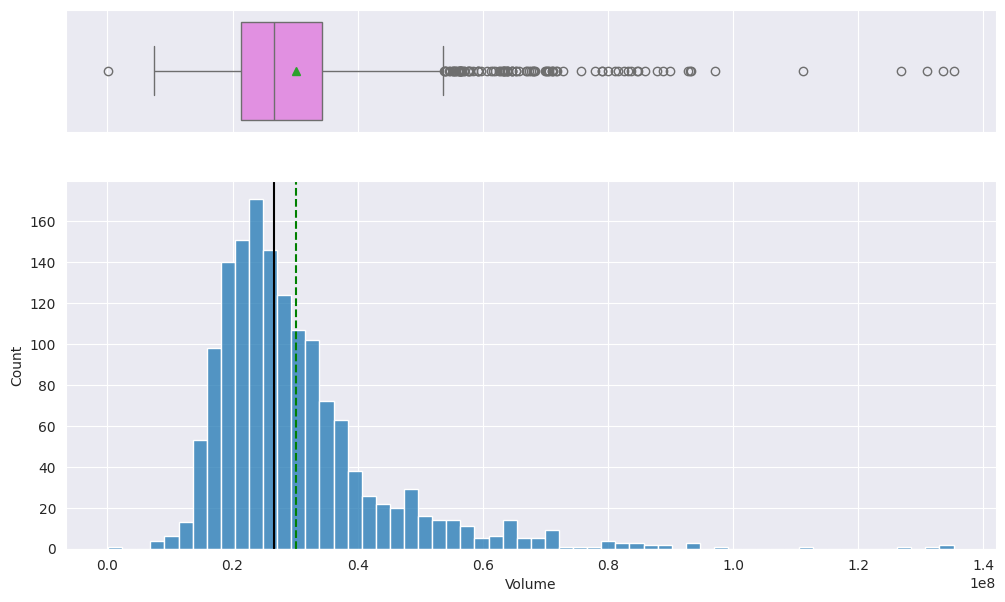

In [96]:
histogram_boxplot(data, "Volume")

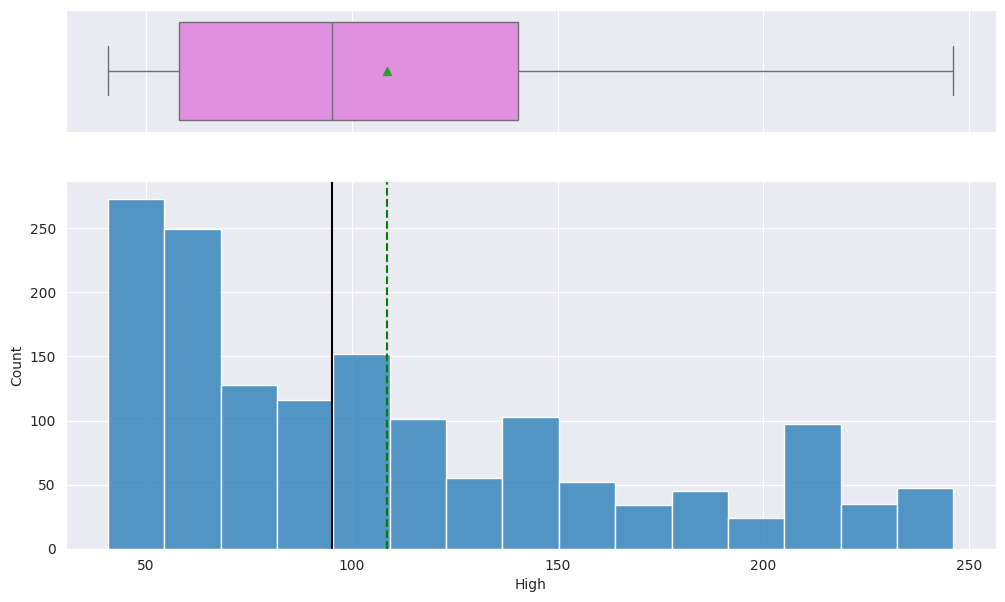

In [97]:
histogram_boxplot(data, "High")

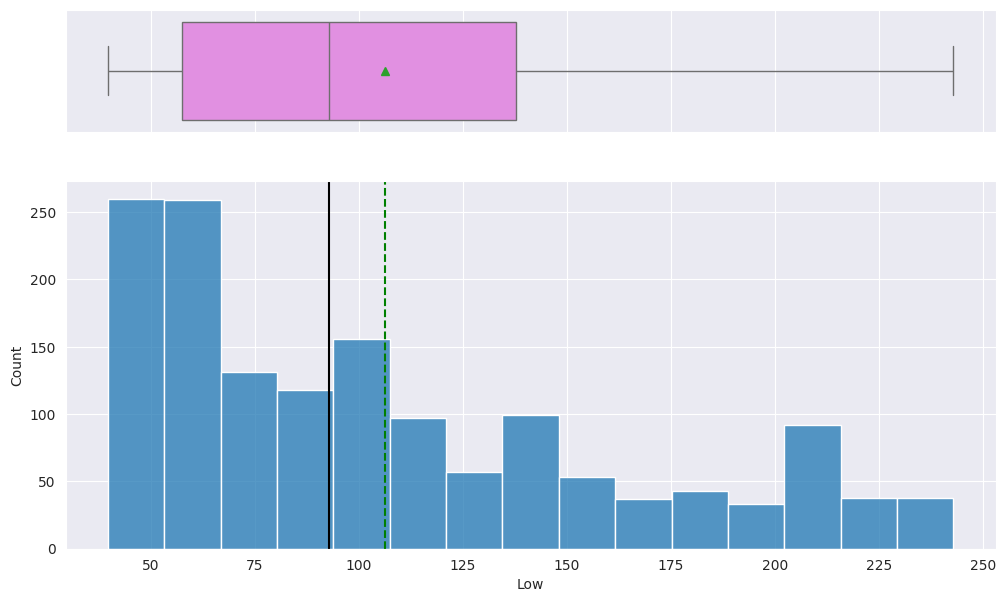

In [98]:
histogram_boxplot(data, "Low")

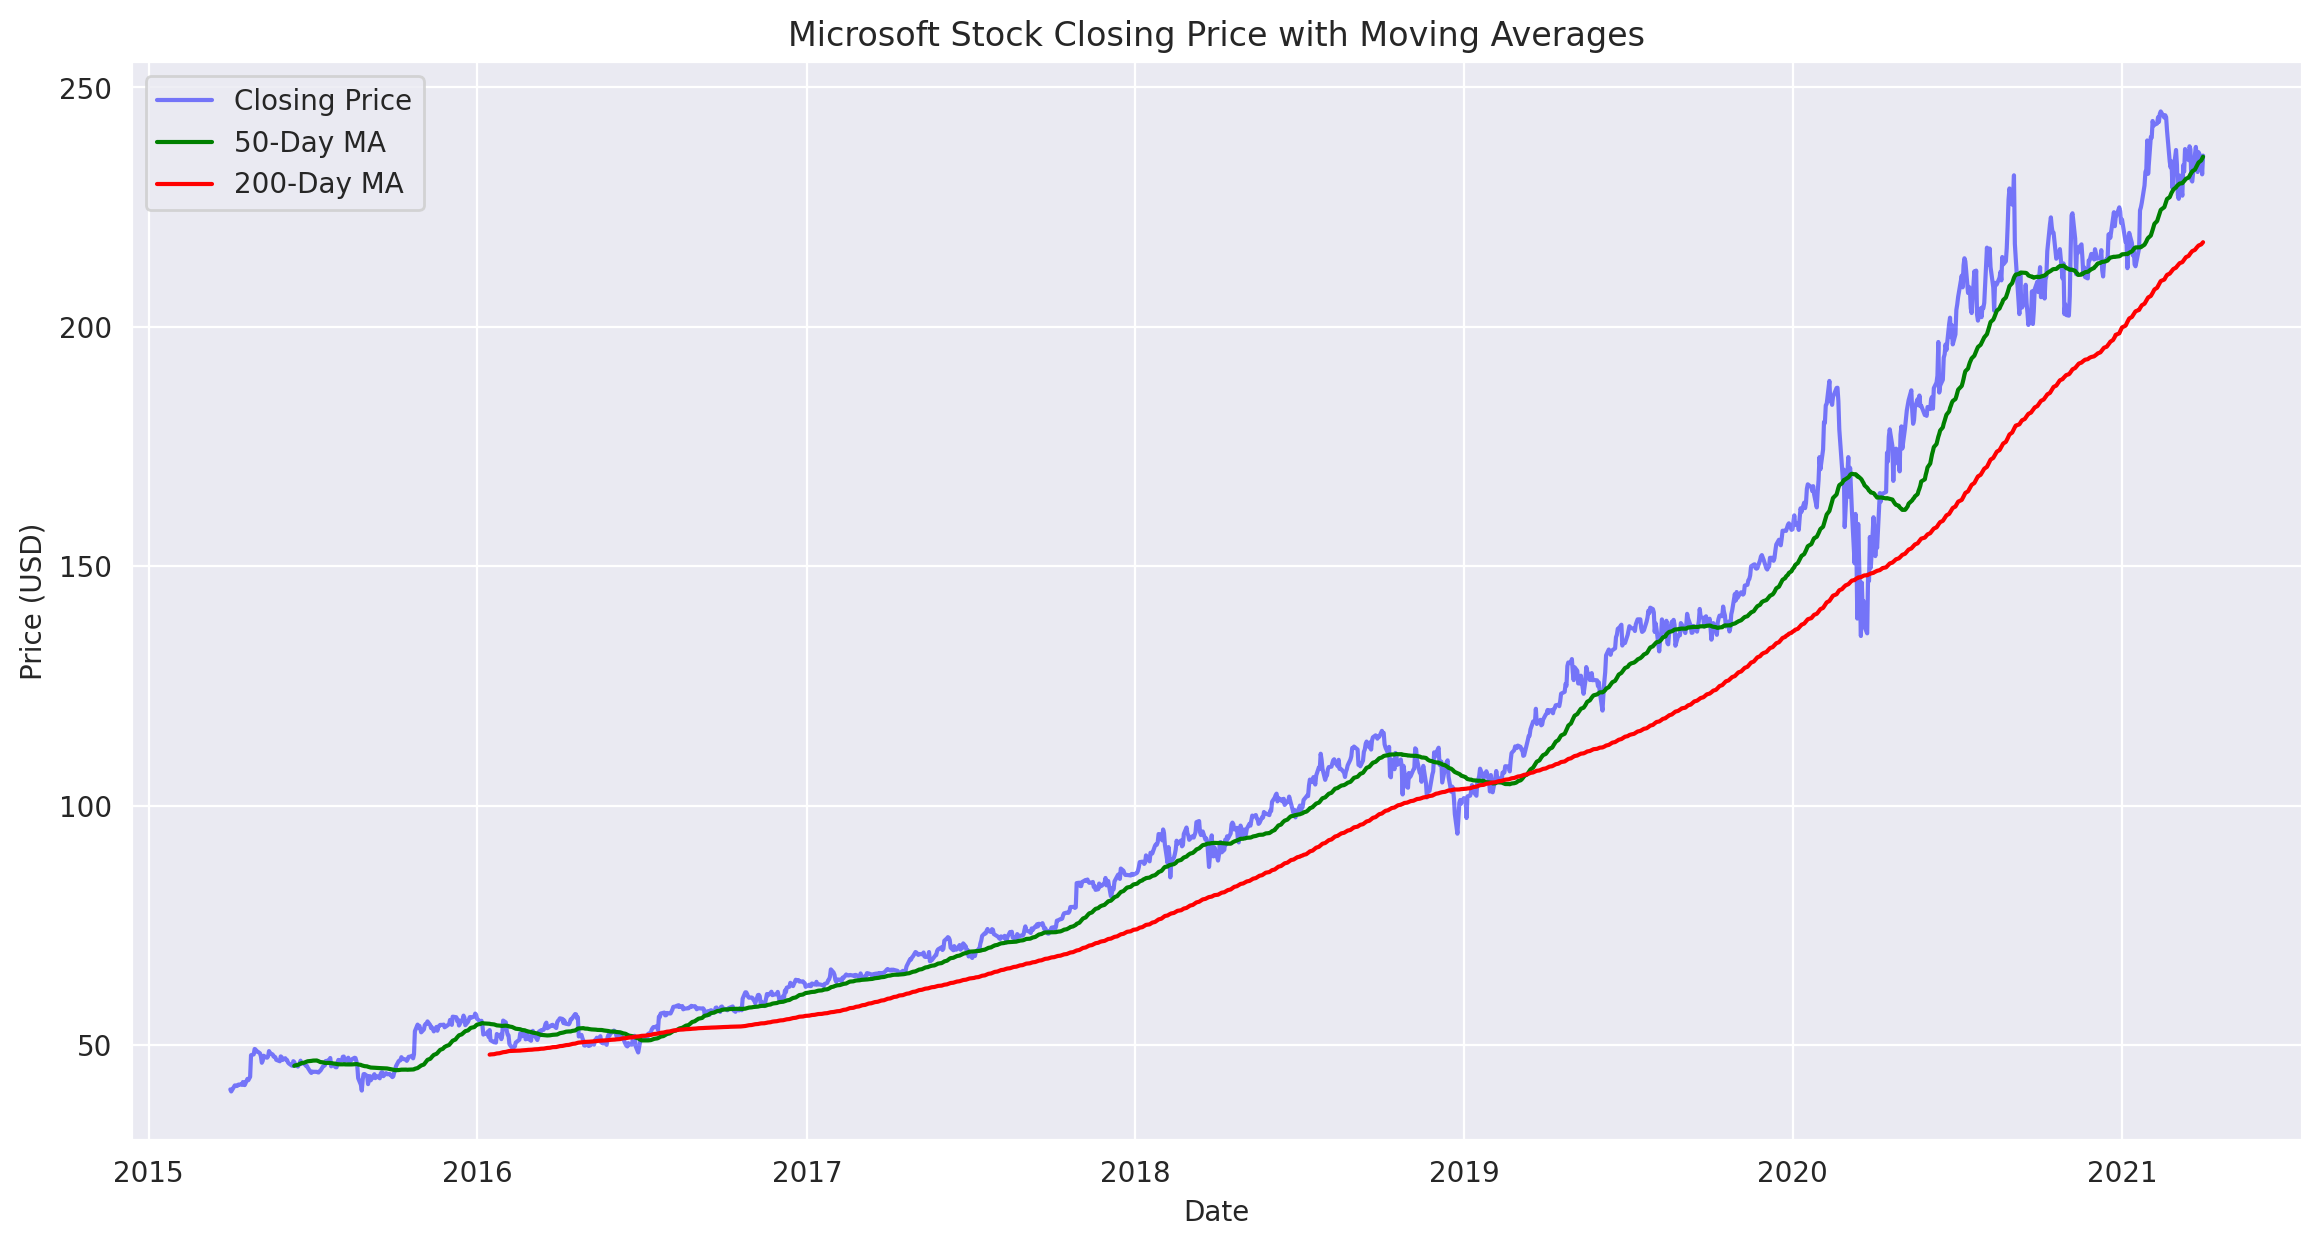

In [99]:
# Calculate the 50-day and 200-day moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Plotting
plt.figure(figsize=(14, 7), dpi=200)
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(data['Date'], data['MA50'], label='50-Day MA', color='green')
plt.plot(data['Date'], data['MA200'], label='200-Day MA', color='red')
plt.title('Microsoft Stock Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


## **Observations:**
The plot above includes the 50-day and 200-day moving averages alongside the closing price of Microsoft's stock. These moving averages smooth out short-term fluctuations and highlight longer-term trends in the stock price.

- The 50-day moving average (in green) provides insight into the medium-term trend and is often used by traders to gauge the direction of the trend within a shorter timeframe.
- The 200-day moving average (in red) is a key indicator for the long-term trend, helping investors identify the overall direction of the market and support or resistance levels.

## **Calculating the daily price changes (daily returns) to assess the stock's volatility.**

In [100]:
# Calculate daily returns as the percentage change in closing price from the previous day
data['Daily Returns'] = data['Close'].pct_change() * 100

# Display the first few rows to verify the calculation
#data[['Date', 'Close', 'Daily Returns']].head()
data.head()

,Date,Open,High,Low,Close,Volume,day,month,year,MA50,MA200,Daily Returns
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,1,4,2015,NaN,NaN,NaN
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,2,4,2015,NaN,NaN,-1.06
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,6,4,2015,NaN,NaN,3.13
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,7,4,2015,NaN,NaN,-0.05
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,8,4,2015,NaN,NaN,-0.26


## **Histogram of daily price changes to visualize the distribution and identify if the stock returns follow a normal distribution**

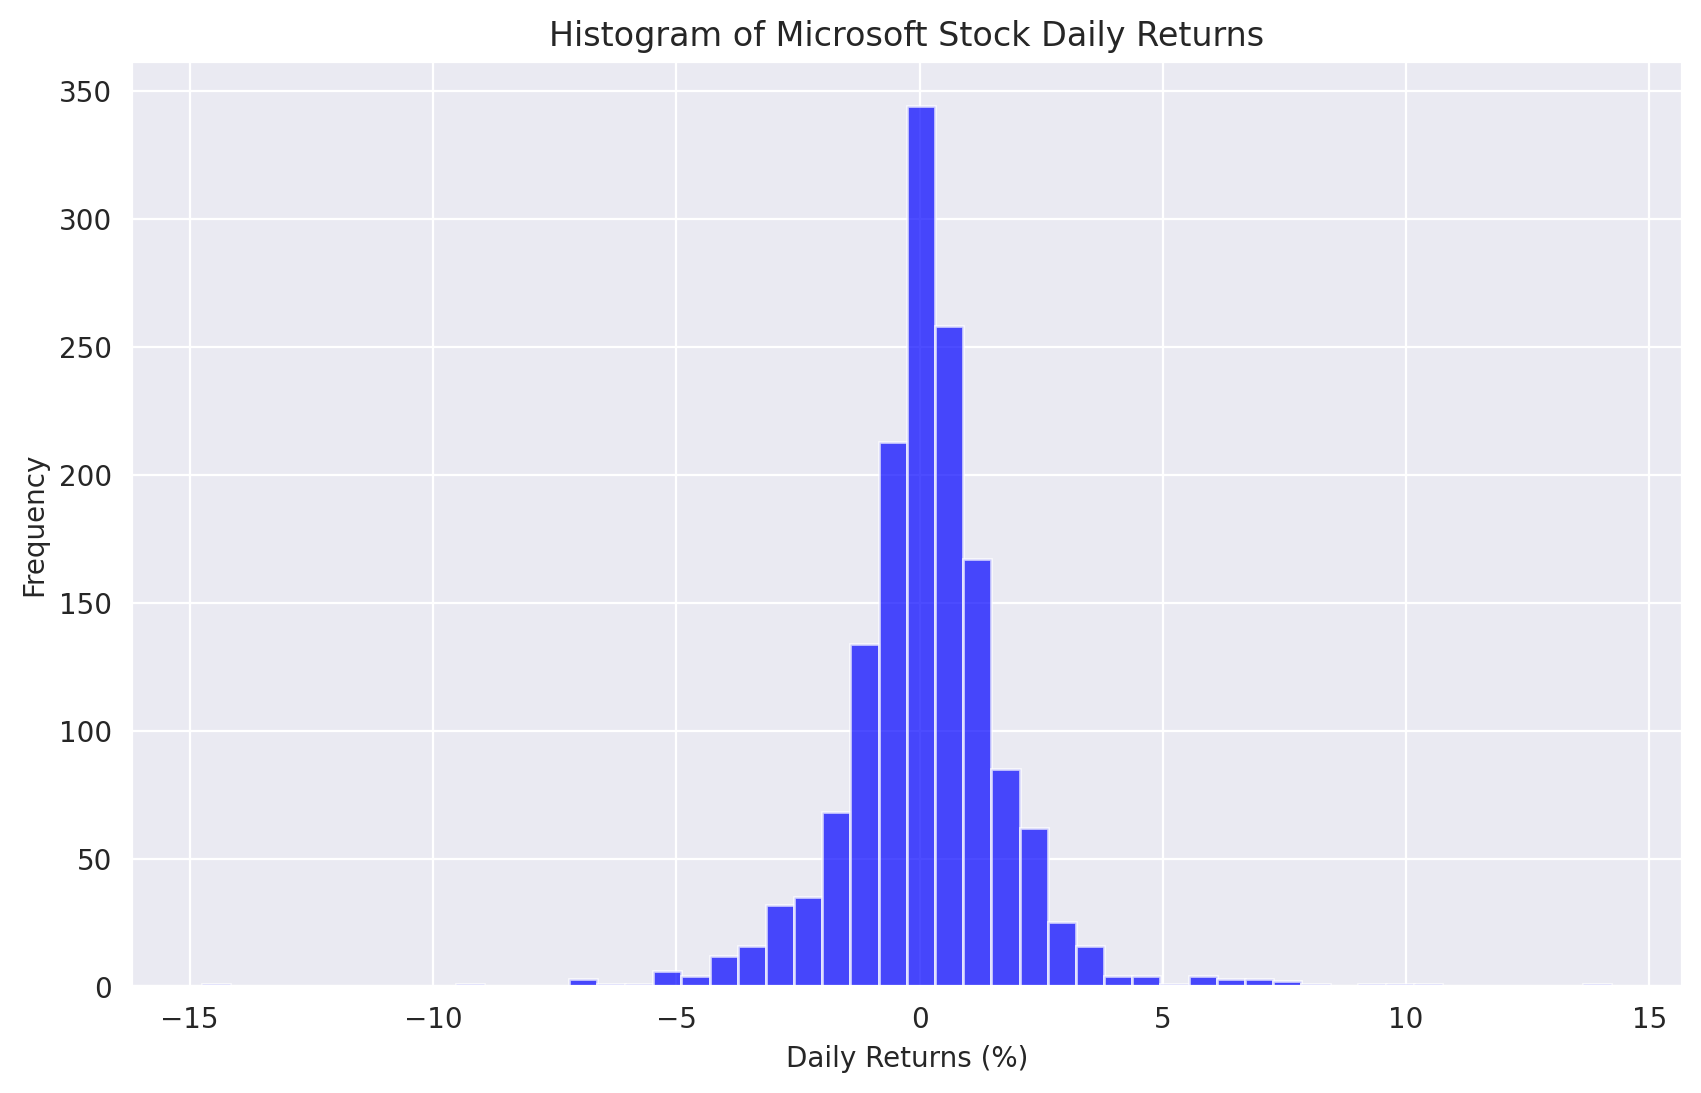

In [101]:
# Plotting a histogram of the daily returns to visualize the distribution
plt.figure(figsize=(10, 6), dpi=200)
plt.hist(data['Daily Returns'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Microsoft Stock Daily Returns')
plt.xlabel('Daily Returns (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


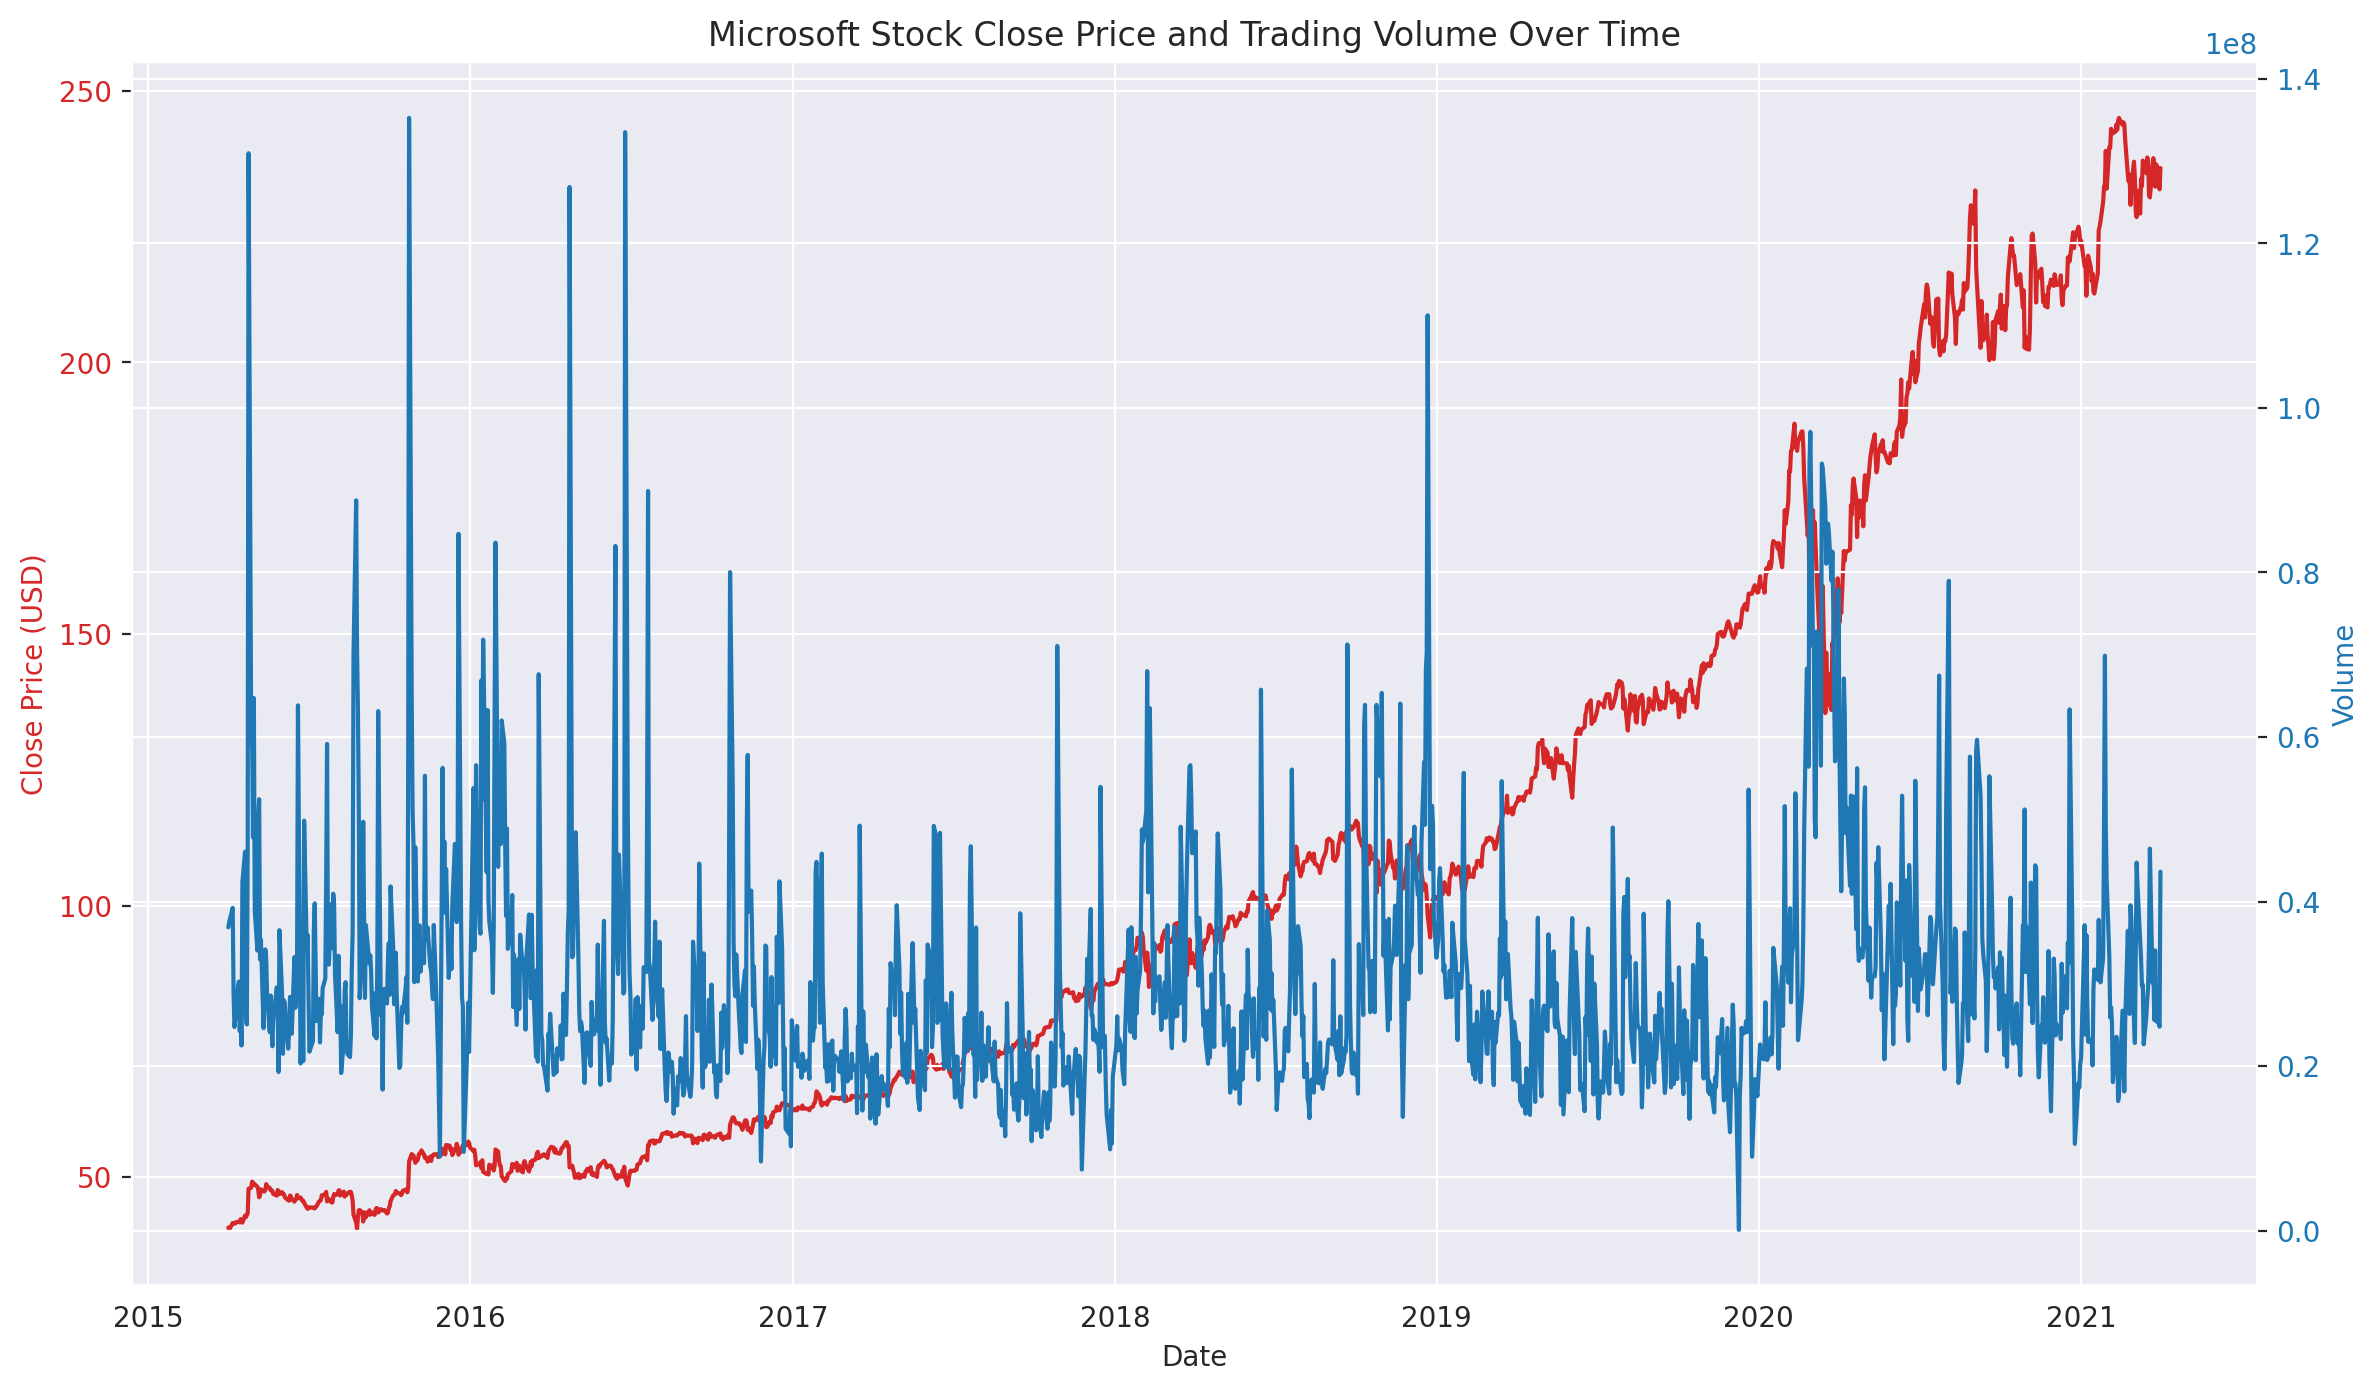

In [102]:
# Plotting trading volume over time
fig, ax1 = plt.subplots(figsize=(12, 7), dpi=200)

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (USD)', color=color)
ax1.plot(data['Date'], data['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Date'], data['Volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Microsoft Stock Close Price and Trading Volume Over Time')
plt.show()


## **Observations:**
The plot above shows the closing price of Microsoft's stock (in red) and the trading volume (in blue) over time, using a dual-axis chart to facilitate comparison. This visualization helps in understanding how trading volume correlates with price changes.

- Periods of high trading volume may correspond to significant price movements. For instance, a large volume spike might accompany a notable increase or decrease in the stock price, indicating strong buyer or seller interest, respectively.
- Consistent trends in trading volume can signal the strength of a price trend. Increasing volume alongside a price uptrend might confirm bullish sentiment, while increasing volume during a downtrend could signal bearish sentiment.
- Occasions where the price continues to rise while volume decreases (or vice versa) may suggest a weakening of the prevailing trend and a potential reversal.

## **Comparing average trading volumes during different periods (e.g., comparing pre-pandemic and post-pandemic volumes) to understand how external factors affect trading activity**

In [103]:
# For this example, we'll define pre-pandemic as before 2020 and post-pandemic as 2020 onwards.
# This is a simplification, as the pandemic effects on the market started in early 2020, but it should serve for a basic comparison.

# Filtering the data
pre_pandemic = data[data['Date'] < '2020-01-01']
post_pandemic = data[data['Date'] >= '2020-01-01']

# Calculating average volumes
avg_volume_pre_pandemic = pre_pandemic['Volume'].mean()
avg_volume_post_pandemic = post_pandemic['Volume'].mean()

avg_volume_pre_pandemic, avg_volume_post_pandemic


(28601513.56140351, 36286976.958598725)

## **Observations:**

The average trading volume for Microsoft's stock shows a noticeable increase when comparing the pre-pandemic period (before 2020) to the post-pandemic period (2020 onwards). Specifically:

- **Pre-pandemic average trading volume:** Approximately 28,601,514 shares.
- **Post-pandemic average trading volume:** Approximately 36,286,977 shares.
- This indicates a significant rise in trading activity during and after the onset of the COVID-19 pandemic, reflecting how external factors, such as global health crises, can substantially affect trading volumes. This increase might be attributed to heightened market volatility, changes in investor sentiment, and shifts in investment strategies during the pandemic

## **Establishing the correlation between daily price changes and trading volumes to see if higher volumes are associated with significant price changes**

In [104]:
# Calculating the correlation coefficient between daily price changes (daily returns) and trading volumes
correlation = data['Daily Returns'].corr(data['Volume'])

correlation


-0.03553797346954556

## **Observation:**
The correlation coefficient between daily price changes (daily returns) and trading volumes for Microsoft's stock is approximately -0.036. This indicates a very weak negative linear relationship between the two variables.



## **Calculating performance metrics such as the Compound Annual Growth Rate (CAGR) to quantify the stock's return over the dataset period**

In [105]:
from datetime import datetime

# Calculating CAGR
# CAGR = (Ending Value / Beginning Value) ^ (1 / N) - 1
# where N is the number of years

# Assuming the dataset spans from the first to the last date in the 'Date' column
start_date = data['Date'].min()
end_date = data['Date'].max()
start_value = data.loc[data['Date'] == start_date, 'Close'].values[0]
end_value = data.loc[data['Date'] == end_date, 'Close'].values[0]

# Calculating the number of years
n_years = (end_date - start_date).days / 365.25

# Calculating CAGR
cagr = (end_value / start_value) ** (1 / n_years) - 1

cagr


0.3401162409157328

## **Observations:**

The Compound Annual Growth Rate (CAGR) for Microsoft's stock over the dataset period is approximately 34.01%. This metric quantifies the stock's return over the period, assuming the gains were reinvested at the end of each year. A CAGR of 34.01% indicates a robust annual growth rate in the stock's value, highlighting its strong performance over the time span covered by the dataset.

## **Compute the Sharpe ratio using daily returns to measure the stock's risk-adjusted return**

In [106]:
# The Sharpe Ratio is calculated as: (Mean Return - Risk-Free Rate) / Standard Deviation of Return
# For simplicity, we'll assume the risk-free rate is 0 (considering short-term government securities yield close to 0% in many scenarios).
# This simplification focuses the calculation on the excess return per unit of volatility (standard deviation).

# Dropping the first NA value from daily returns before calculation
daily_returns = data['Daily Returns'].dropna()

# Mean daily return
mean_daily_return = daily_returns.mean()

# Standard deviation of daily returns
std_dev_daily_return = daily_returns.std()

# Assuming a risk-free rate of 0
risk_free_rate = 0

# Calculating the Sharpe Ratio
sharpe_ratio = (mean_daily_return - risk_free_rate) / std_dev_daily_return

sharpe_ratio


0.07539156262851045

## **Observations:**

- The Sharpe ratio for Microsoft's stock, using the daily returns and assuming a risk-free rate of 0, is approximately 0.075. This metric is used to measure the stock's risk-adjusted return, indicating how much excess return is received for the extra volatility endured by holding the stock instead of a risk-free asset.

- A Sharpe ratio of 0.075 suggests that for every unit of risk (volatility in returns), Microsoft's stock has historically provided a modest excess return over the risk-free rate. While the interpretation of the Sharpe ratio can depend on the context and comparison benchmarks, higher values generally indicate more attractive risk-adjusted returns.

## **Developing predictive models for stock prices**

Here I will be bulding three machine learning regression models for the stock prices:
- Random Forest Regression
- Linear Regression
- ARIMA (AutoRegressive Integrated Moving Average)

## **Data Preprocessing**

In [107]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#data['Date'] = pd.to_datetime(data['Date'])
#data.set_index('Date', inplace=True)

# Selecting the Close price for modeling
prices = data['Close'].values.reshape(-1, 1)

# Normalize prices for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
prices_normalized = scaler.fit_transform(prices)


## **Linear Regression**

In [110]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Convert dates to number of days since the minimum date
data['Date'] = (data['Date'] - data['Date'].min()) / np.timedelta64(1, 'D')

X = data["Date"].values.reshape(-1, 1)  # Time as a feature
y = prices  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

print("Linear Regression MSE:", mean_squared_error(y_test, predictions))

Linear Regression MSE: 324.4234849396612


## **ARIMA**
ARIMA models are suitable for time series data like stock prices.

In [111]:
from statsmodels.tsa.arima.model import ARIMA

# Convert `prices` to a 1D array for ARIMA
prices_series = pd.Series(data['Close'].values)

# Fit the ARIMA model (you might need to adjust p, d, q based on your data)
model = ARIMA(prices_series, order=(5, 1, 0))  # Example parameters
model_fit = model.fit()

# Forecast
predictions = model_fit.forecast(steps=5)  # Forecasting next 5 values as an example
print(predictions)


1511   234.56
1512   234.77
1513   234.94
1514   234.83
1515   234.84
Name: predicted_mean, dtype: float64


## **Random Forest Regression**
Random Forest can capture complex non-linear relationships in the data.



In [112]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train, y_train.ravel())
predictions = rf_reg.predict(X_test)

print("Random Forest MSE:", mean_squared_error(y_test, predictions))


Random Forest MSE: 4.213636628745858


## **Observations:**
The Random Forest model has a much lower MSE compared to the Linear Regression model. This significantly lower MSE value suggests that the Random Forest model has a higher accuracy in predicting the target variable, as it results in smaller prediction errors on average.

## **Calculating and plotting technical indicators like the Relative Strength Index (RSI), Bollinger Bands, and MACD to generate buy or sell signals based on historical price and volume data**

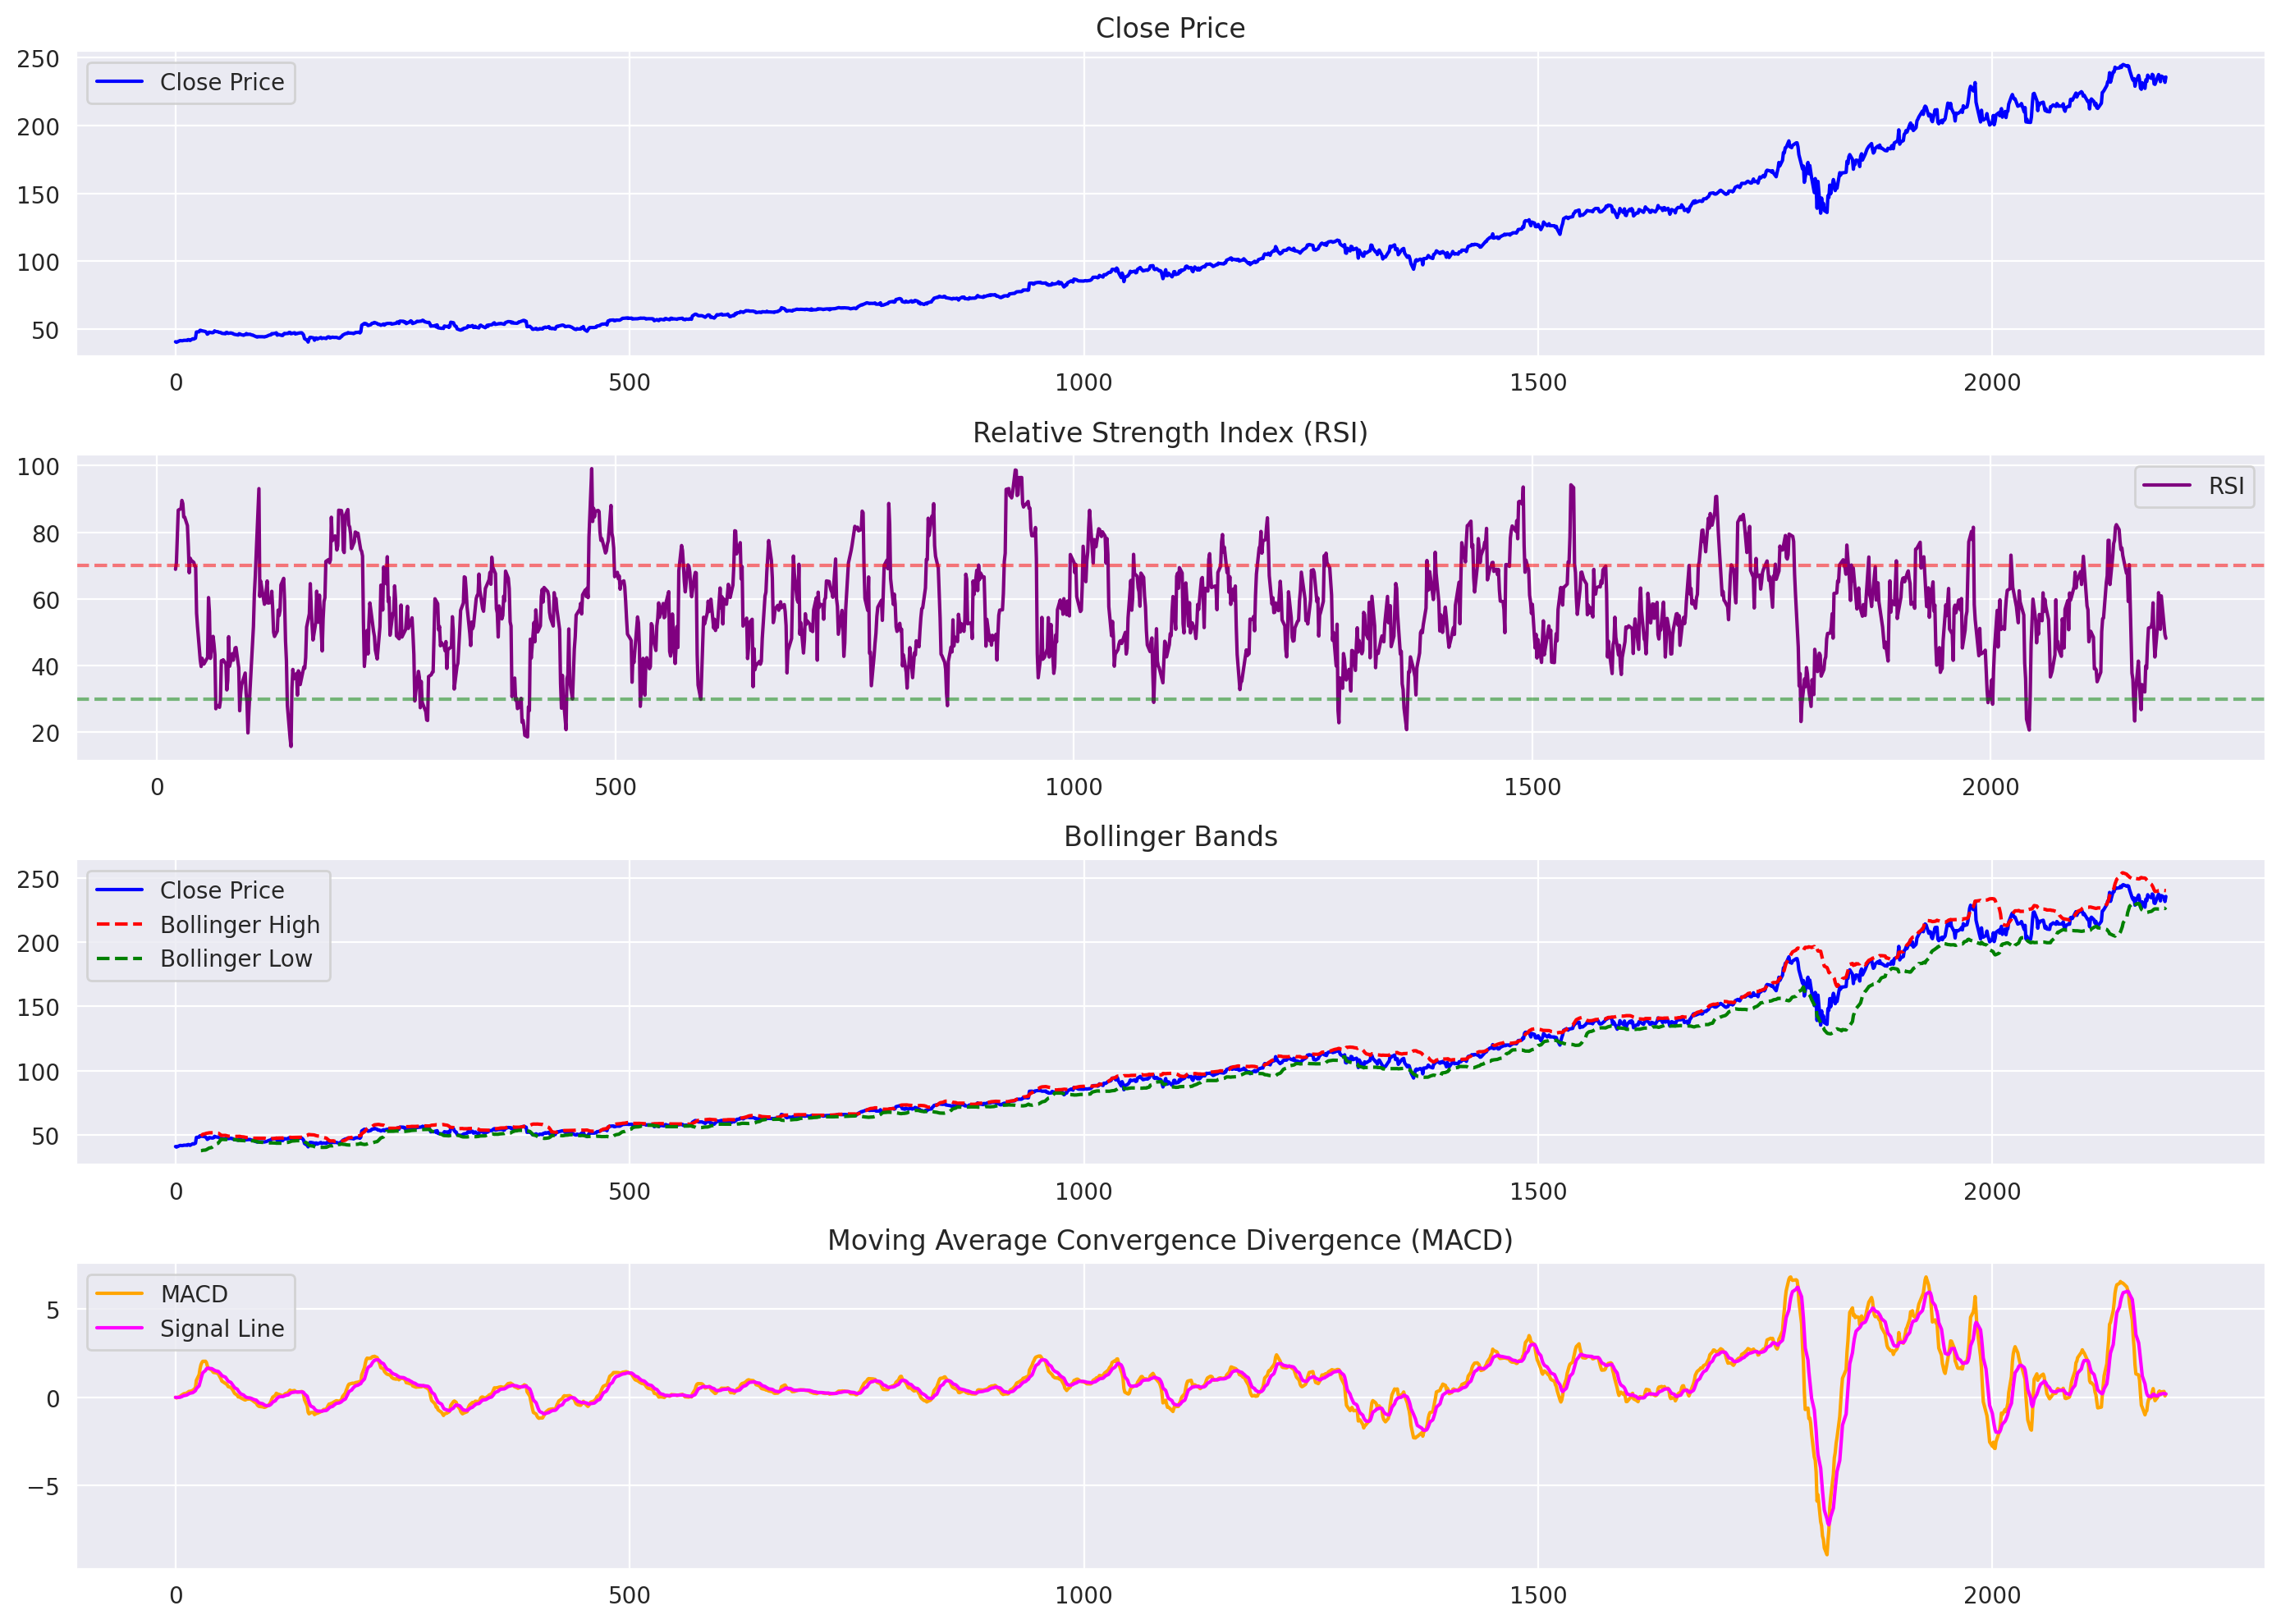

In [115]:
# Calculating RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Calculating Bollinger Bands
def calculate_bollinger_bands(data, window=20, no_of_stdev=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()

    data['Bollinger High'] = rolling_mean + (rolling_std * no_of_stdev)
    data['Bollinger Low'] = rolling_mean - (rolling_std * no_of_stdev)

calculate_bollinger_bands(data)

# Calculating MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['MACD'] = short_ema - long_ema
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

calculate_macd(data)

plt.figure(figsize=(14, 10), dpi=200)

# Close Price
plt.subplot(411)
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('Close Price')
plt.legend()

# RSI
plt.subplot(412)
plt.plot(data['Date'], data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('Relative Strength Index (RSI)')
plt.legend()

# Bollinger Bands
plt.subplot(413)
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['Bollinger High'], label='Bollinger High', color='red', linestyle='--')
plt.plot(data['Date'], data['Bollinger Low'], label='Bollinger Low', color='green', linestyle='--')
plt.title('Bollinger Bands')
plt.legend()

# MACD
plt.subplot(414)
plt.plot(data['Date'], data['MACD'], label='MACD', color='orange')
plt.plot(data['Date'], data['Signal Line'], label='Signal Line', color='magenta')
plt.title('Moving Average Convergence Divergence (MACD)')
plt.legend()

plt.tight_layout()
plt.show()

## **Observations:**

- **Close Price:** The first subplot shows the closing price of Microsoft's stock over time, providing a baseline for comparison with the indicators.

- **Relative Strength Index (RSI):** The RSI values are plotted in the second subplot. The horizontal lines at 70 (red) and 30 (green) mark the overbought and oversold thresholds, respectively. Values above 70 suggest a stock might be overbought, while values below 30 indicate it might be oversold.

- **Bollinger Bands:** The third subplot shows the Bollinger Bands, with the stock's closing price in blue, the upper band in red, and the lower band in green. The bands provide insight into the stock's volatility—narrow bands suggest low volatility, while wide bands indicate high volatility.

- **Moving Average Convergence Divergence (MACD):** The MACD line (orange) and its signal line (magenta) are plotted in the fourth subplot. Crossovers between these two lines can signal potential buy or sell opportunities. Specifically, when the MACD crosses above the signal line, it may be considered a buy signal, and when it crosses below, a sell signal.

## **Conclusions:**

The comprehensive analysis of Microsoft's stock using various data visualization and statistical methods has provided several critical insights into its performance and market behavior:

- Stock Performance Overview: The plotted closing prices over time have depicted Microsoft's growth, stability, and notable fluctuations. This trend visualization serves as a foundation for deeper analysis, allowing investors to understand historical volatility and identify potential future trends.

- Moving Averages: The 50-day and 200-day moving averages are instrumental in smoothing out short-term price fluctuations and highlighting longer-term trends, respectively. These indicators are crucial for investors to gauge market direction and establish potential entry and exit points.

- Volume Analysis: The dual-axis chart illustrating trading volume in relation to stock price changes has emphasized the correlation between volume spikes and significant price movements. This correlation suggests that high trading volumes are often a precursor to important price changes, serving as a signal for bullish or bearish market sentiment.

- Pandemic Impact: There was a noticeable increase in trading volume post-pandemic, suggesting that external events such as global crises significantly affect market behavior and investor sentiment, thereby impacting trading volumes and strategies.

- CAGR: A Compound Annual Growth Rate of 34.01% over the study period underscores Microsoft's robust growth and strong market performance.
Sharpe Ratio: A Sharpe ratio of 0.075, though modest, indicates that Microsoft's stock offers a reasonable excess return per unit of risk, providing a beneficial option for risk-averse investors.
Technical Indicators:

- RSI: The Relative Strength Index has helped identify potential overbought or oversold conditions, aiding in timing the market more effectively.
- Bollinger Bands: These bands have highlighted the stock's volatility levels, providing insights into the risk associated with the stock at various times.
- MACD: The Moving Average Convergence Divergence has been useful for signaling potential buy or sell opportunities, enhancing strategy formulation based on trend reversals and continuations.
- Model Predictive Accuracy: The comparison of MSE values between the Linear Regression and Random Forest models indicates that the Random Forest model, with a significantly lower MSE, is more accurate in predicting stock prices. This suggests a better fit for the data and a more reliable model for forecasting Microsoft’s stock movements.

## **Bussiness Recommendations:**
- Utilize Moving Averages: Continuously monitor the 50-day and 200-day moving averages to identify potential buy or sell signals based on the crossover points. This can help in timing the market more effectively.
- Apply RSI and MACD: Use the Relative Strength Index (RSI) and Moving Average Convergence Divergence (MACD) to refine entry and exit strategies. For instance, consider selling when the RSI exceeds 70 (overbought) and buying when it falls below 30 (oversold). Similarly, use MACD crossovers as signals for potential reversals.

- Risk Management: Given the volatility insights provided by the Bollinger Bands, implement risk management strategies that adjust the investment portfolio according to the level of volatility. This could include setting stop-loss orders to protect against significant losses during highly volatile periods.
- Diversification: Diversify the investment portfolio to spread risk across different assets, which can mitigate potential negative impacts from Microsoft stock's volatility.

- Enhance Trading Volume Strategies: Acknowledging the increase in trading volume during the pandemic, develop strategies that capitalize on heightened market activity. This might include algorithmic trading techniques that can take advantage of increased volatility and trading volumes.
- Monitor External Factors: Continue to analyze how external factors like global economic changes affect stock performance. This will enable more proactive adjustments to investment strategies in response to world events.

- Invest in Advanced Analytical Tools: Given the success of the Random Forest model over Linear Regression in predicting stock prices, invest in advanced machine learning and predictive analytics tools. These tools can provide deeper insights and more accurate forecasts for stock price movements.
- Continuous Model Improvement: Regularly update and recalibrate predictive models to maintain their accuracy over time. Incorporate new data and consider additional variables that may impact stock prices, such as economic indicators or sector trends

# **I Hope You Enjoyed It?**